In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
def plot_bar_chart(var):
    survived = train[train['Survived']==1][var].value_counts()
    dead = train[train['Survived'] == 0][var].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'dead']
    df.plot(kind = 'bar', stacked = False, figsize = (8,5), alpha=0.7)

### Group by sex

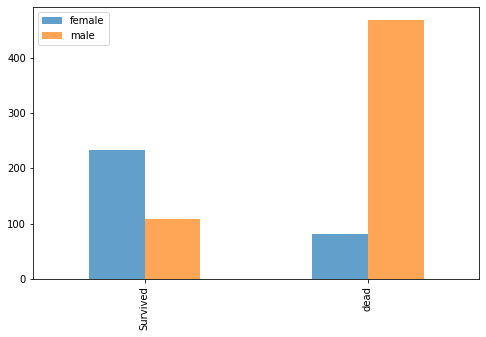

In [9]:
%matplotlib inline
plot_bar_chart('Sex')

### Group by 'Pclass'
'Pclass' is the ticket class

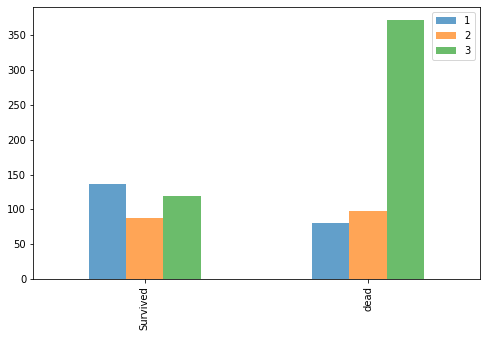

In [10]:
plot_bar_chart('Pclass')

### Group by 'Embarked'
'Embarked' is the port of Embarkation

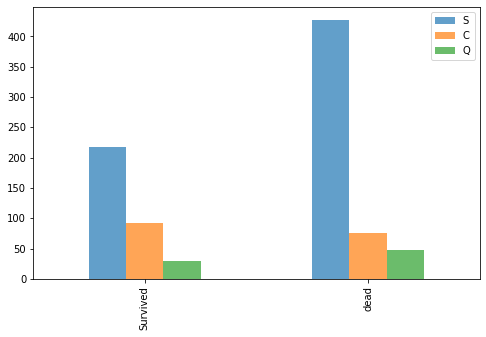

In [11]:
plot_bar_chart('Embarked')

### Group by Age

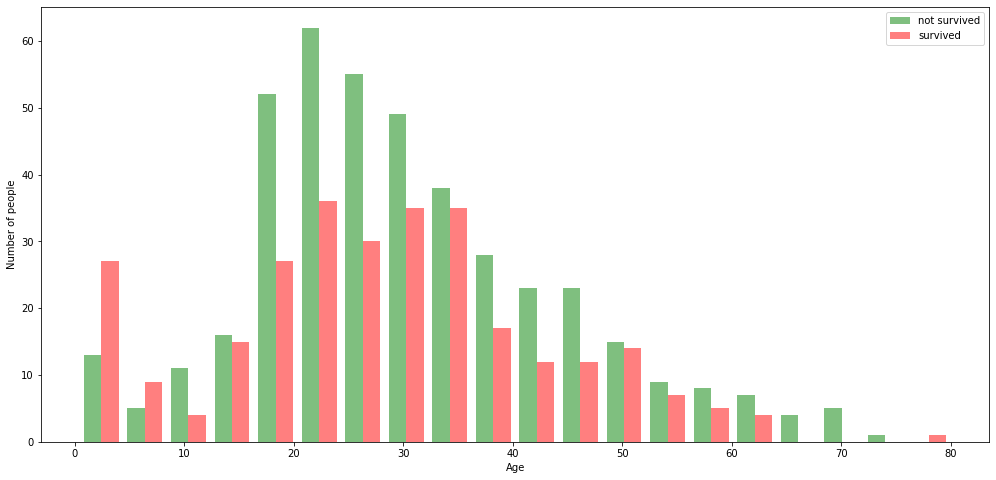

In [12]:
figure = plt.figure(figsize=(17,8))
plt.hist([train[train['Survived']== 0]['Age'], train[train['Survived']== 1]['Age']],stacked=False, 
         color = ['g','r'],bins = 20, alpha = 0.5,
         label = ['not survived', 'survived'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend()

In [13]:
type(train['Age'].mode())

pandas.core.series.Series

### Replace missing values with mode

In [14]:
train['Age'].fillna(train['Age'].mode()[0],inplace=True)

In [15]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
train.drop(columns = ['PassengerId','Cabin', 'Name', 'Ticket'], inplace = True)

In [18]:
train['Family'] = train['SibSp'] + train['Parch']

In [19]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
5,0,3,male,24.0,0,0,8.4583,Q,0
6,0,1,male,54.0,0,0,51.8625,S,0
7,0,3,male,2.0,3,1,21.0750,S,4
8,1,3,female,27.0,0,2,11.1333,S,2
9,1,2,female,14.0,1,0,30.0708,C,1


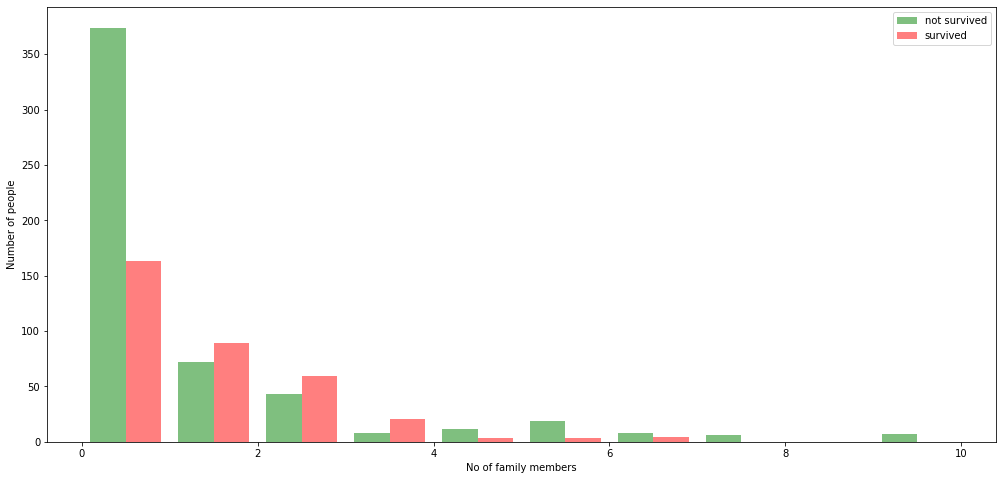

In [20]:
figure = plt.figure(figsize=(17,8))
plt.hist([train[train['Survived']== 0]['Family'], train[train['Survived']== 1]['Family']],stacked=False, 
         color = ['g','r'], alpha = 0.5,
         label = ['not survived', 'survived'])
plt.xlabel('No of family members')
plt.ylabel('Number of people')
plt.legend()

In [21]:
train.drop(columns = ['SibSp', 'Parch'], inplace = True)
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0


## Convert "Sex", "Pclass", and "Embarked" into dummy variables

In [22]:
train['Pclass'] = train['Pclass'].astype(str)
train = pd.get_dummies(train)
train.head()

,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,0,1,0,0,1


## Seperate data as target and features

In [23]:
y = train.loc[:,'Survived']
x = train.loc[:,'Age':'Embarked_S']

In [24]:
type(x)

pandas.core.frame.DataFrame

## Model fitting with cross validation

In [25]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
c = [0.01,0.1,1,10,100]

for i in (c):
    logReg = LogisticRegression(solver='lbfgs', C=i, penalty = 'l2', max_iter = 1000)
    scores = cross_val_score(estimator = logReg, X = x, y = y, cv = 10)
    print("C : {:}".format(i))
    print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))
    

C : 0.01
accuracy of the model :0.7980 +/- 0.0334
C : 0.1
accuracy of the model :0.8003 +/- 0.0267
C : 1
accuracy of the model :0.7969 +/- 0.0224
C : 10
accuracy of the model :0.7969 +/- 0.0224
C : 100
accuracy of the model :0.7969 +/- 0.0224


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=70, max_depth = 8, random_state=56)
scores = cross_val_score(estimator = forest, X = x, y = y, cv = 10)
print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

accuracy of the model :0.8340 +/- 0.0484


### Plot feature importance

[0.17483879 0.18793537 0.07689269 0.04533111 0.01603507 0.07527468
 0.20613976 0.18339976 0.01332625 0.00639408 0.01443244]
[ 9  8 10  4  3  5  2  0  7  1  6]
Index(['Embarked_Q', 'Embarked_C', 'Embarked_S', 'Pclass_2', 'Pclass_1',
       'Pclass_3', 'Family', 'Age', 'Sex_male', 'Fare', 'Sex_female'],
      dtype='object')


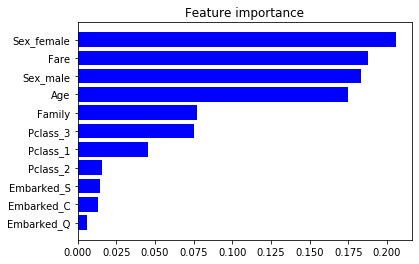

In [28]:
%matplotlib inline
forest.fit(x,y)
importance = forest.feature_importances_
print(importance)
indices = np.argsort(importance)
print(indices)
labels = train.loc[:,'Age':'Embarked_S'].columns[indices]
print(labels)
plt.title("Feature importance")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), labels)
plt.show()

### Fitting the model without last three features

In [29]:
x_selected = train.loc[:,'Age':'Sex_male']

In [30]:
x_selected.shape

(891, 8)

In [31]:
scalar = StandardScaler()
scalar.fit(x_selected)
x_selected = scalar.transform(x_selected)

In [32]:
scores = cross_val_score(estimator = forest, X = x_selected, y = y, cv = 10)
print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

accuracy of the model :0.8385 +/- 0.0484


## Parameter tuning with GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = {'bootstrap': [True],
       'criterion': ['gini', 'entropy'],
       'max_depth': [2,5,10,15,20,None],
       'max_features':['auto', 'sqrt','log2'],
       'n_estimators':[10,20,30,40,50,60,70,80,90,100],
       'warm_start': [True, False],
       'random_state': [46]}

In [35]:
ranForest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = ranForest, param_grid = grid, 
                          cv = 10, n_jobs = 3, verbose = 2, iid = False)

In [36]:
grid_search.fit(x_selected, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 118 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done 1570 tasks      | elapsed:   32.5s
[Parallel(n_jobs=3)]: Done 3142 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 4840 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 7030 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 7200 out of 7200 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [37]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 70,
 'random_state': 46,
 'warm_start': True}

In [38]:
best_grid = grid_search.best_estimator_

In [39]:
scores = cross_val_score(estimator = best_grid, X = x_selected, y = y, cv = 10)
print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

accuracy of the model :0.8441 +/- 0.0492
